# Population CTMC (PCTMC)

Consider a CTMC model of a
population in which
each of $N$ individuals can be in a state of state space $S$. Firing rate may depends on the
density of individuals in certain states.

Use the classes developed in the notebook `PCTMC_methods` to define an instance of a PCTMC model.
In order to correctly define a PCTMC model, one should define:
 - state variables,
 - rate parameters,
 - initial state $x_0$,
 - system size,
 - transitions: update vectors and propensity functions.

In [1]:
from ipynb.fs.full.PCTMC_methods import *
from time import perf_counter as timer

pctmc = Model()
#### Syntax to add variables:
pctmc.add_variable("A", initial_value)
#### Syntax to add parameters:
pctmc.add_parameter("k", param_value)
#### Set the dimension of the population:
pctmc.set_system_size("N",population_size)
#### Syntax to add transitions: 
pctmc.add_transition({"A": -1, "B": +1}, "rate*A") --> use symbolic expressions for propensity functions

Remember to **finalize** the initialization: pctmc.finalize_initialization()

Below you can see an example for the SIR epidemic model.

In [2]:
def epidemic_model(population_size):
    sir = Model()
    # variables are generated in the following order
    sir.add_variable("S", 0.99*population_size)
    sir.add_variable("I", 0.01*population_size)
    sir.add_variable("R", 0.0*population_size)
    # Adding parameters
    sir.add_parameter("ki", 2)
    sir.add_parameter("kr", 1)
    sir.add_parameter("ke", 1)
    sir.add_parameter("ks", 3)
    #setting the system size N
    sir.set_system_size("N",population_size)
    # Adding transitions, using a dictionary to represent the update vector
    sir.add_transition({"S":-1, "I":1},  "ke*S + ki/N*I*S")
    sir.add_transition({"I":-1, "R":1},  "kr*I")
    sir.add_transition({"R":-1, "S":1},  "ks*R")
    #finalize initialization
    sir.finalize_initialization()
    return sir

### Predator-Prey model
Lotka-Volterra model. Species are two: Predators and Preys.

Possible events are: preys reproduce, predators eat preys and reproduce, predators die off.

In [3]:
def lotka_volterra():
    lv = Model()
    #P stand for predators, p for preys
    lv.add_variable("P",100)
    lv.add_variable("p",150)
    #birth of preys
    lv.add_parameter("b",0.5)
    lv.add_transition({"p":1},"b*p")
    #death of predators
    lv.add_parameter("D",0.05)
    lv.add_transition({"P":-1},"D*P")
    #predators eat preys
    lv.add_parameter("F",0.004)
    lv.add_transition({"p":-1,"P":1},"F*p*P")
    #system size does not influence the system: let's set it random
    lv.set_system_size("N",np.random.randint(1))
    lv.finalize_initialization()
    return lv  

### Genetic Toggle Switch
Model the following system as a PCTMC. There are two genes $G_1$ and $G_2$, that can be in two states: either on or off. When gene $G_i$ is on, it produces a protein $P_i$ that can inhibit the expression of the other gene.

Species are $\{G_1^{on},G_2^{on},G_1^{off},G_2^{off}, P_1, P_2\}$, such that $G_i^{on}+G_i^{off}$ is constant.
The inhibition event is modeled as the binding of protein $P_1$ ($P_2$) with gene $G_2^{off}$ ($G_1^{off}$ ).
The proteins also unbind and degradate according to a given rate.

In [4]:
def gts():
    gts=Model()
    gts.add_variable("G1on",1)
    gts.add_variable("G1off",0)
    gts.add_variable("G2on",1)
    gts.add_variable("G2off",0)
    gts.add_variable("P1",1)
    gts.add_variable("P2",1)
    #production of the first protein
    gts.add_parameter("p1",0.5)
    gts.add_transition({"P1":1},"p1*G1on")
    #production of the second protein
    gts.add_parameter("p2",0.5)
    gts.add_transition({"P2":1},"p2*G2on")
    #inibition of the first gene
    gts.add_parameter("i1",0.7)
    gts.add_transition({"G1off":+1,"G1on":-1},"i1*P2*G1on")
    #inibition of the first gene
    gts.add_parameter("i2",0.7)
    gts.add_transition({"G2off":+1,"G2on":-1},"i2*P1*G2on")
    #degratation of the protein
    gts.add_parameter("d1",0.5)
    gts.add_transition({"P1":-1,"G2on":+1,"G2off":-1},"i1*P1*G2off")
    #inibition of the first gene
    gts.add_parameter("d2",0.7)
    gts.add_transition({"P2":-1,"G1on":+1,"G1off":-1},"d2*P2*G1off")
    #system size does not influence the system: let's set it random
    gts.set_system_size("N",np.random.randint(1))
    gts.finalize_initialization()
    return gts
    


## Stochastic Simulation - SSA algorithm

Look into the class Simulator() and complete function `_SSA_single_simulation` with the ingredients needed to perform SSA simulation of stochastic trajectories.

Plot the stochastic trajectories.


20 % done
40 % done
60 % done
80 % done
100 % done


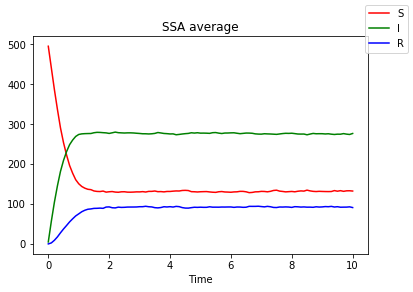

In [5]:
SIR = epidemic_model(500)
sim_ssa_sir=Simulator(SIR).SSA_simulation(10,50,100,20)
sim_ssa_sir.plot()


20 % done
40 % done
60 % done
80 % done
100 % done


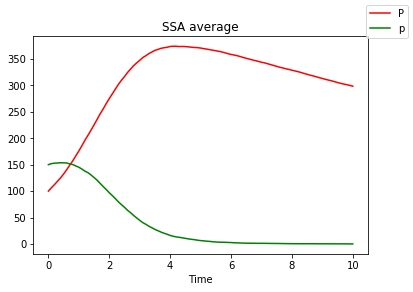

In [6]:
LV= lotka_volterra()
sim_ssa_lv=Simulator(LV).SSA_simulation(10,50,100,20)
sim_ssa_lv.plot()


20 % done
40 % done
60 % done
80 % done
100 % done


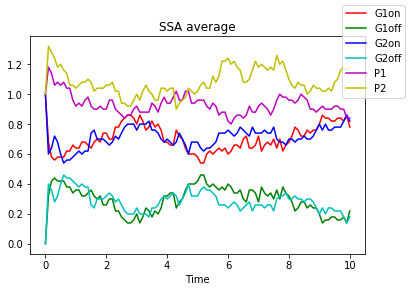

In [7]:
GTS=gts()
sim_ssa_gts=Simulator(GTS).SSA_simulation(10,50,100,20)
sim_ssa_gts.plot()

## Stochastic Approximation

Consider the PCTMC models defined above and implement the **Mean Field** (MF) and the **Linear Noise approximation** (LNA) of the stochastic evolution of the system.

Add the methods *MF_simulation()* and *LN_simulation* in the Simulator class. The overall structure of the solution is already in place, fill the gaps. Some methods in class Model() have to be completed as well. 

Symbolic representation is a key ingredient for the solution, so look at the Simpy documentation if needed.

Plot the deterministic trajectories of the MF approximation and the confidence interval given by the LNS.

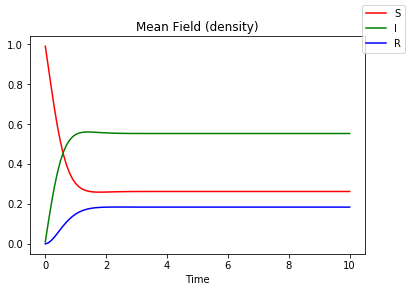

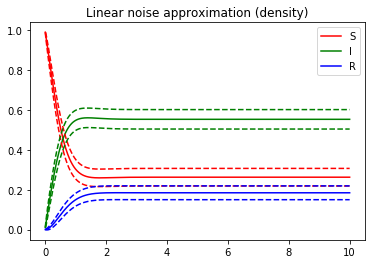

In [8]:
sim_mf_sir=Simulator(SIR).MF_simulation(10,100)
sim_mf_sir.plot()
sol,cov,t,N=Simulator(SIR).LN_simulation(10,1000)
plt.plot(t,sol[:,0],'red',label='S')
plt.plot(t,sol[:,1],'green',label='I')
plt.plot(t,sol[:,2],'blue',label='R')
plt.plot(t,sol[:,0]+2*np.sqrt(cov[:,0,0]/N),'r--')
plt.plot(t,sol[:,0]-2*np.sqrt(cov[:,0,0]/N),'r--')
plt.plot(t,sol[:,1]+2*np.sqrt(cov[:,1,1]/N),'g--')
plt.plot(t,sol[:,1]-2*np.sqrt(cov[:,1,1]/N),'g--')
plt.plot(t,sol[:,2]+2*np.sqrt(cov[:,2,2]/N),'b--')
plt.plot(t,sol[:,2]-2*np.sqrt(cov[:,2,2]/N),'b--')
plt.title("Linear noise approximation (density)")
plt.legend()
plt.show()
#We can't do mean field/linear noise for lotka-volterra/genes because popolation varies so we can't normalize 